In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Abhinay.Verma\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data['Genre'] = data['Genre'].replace({"Male":0, "Female":1})

In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


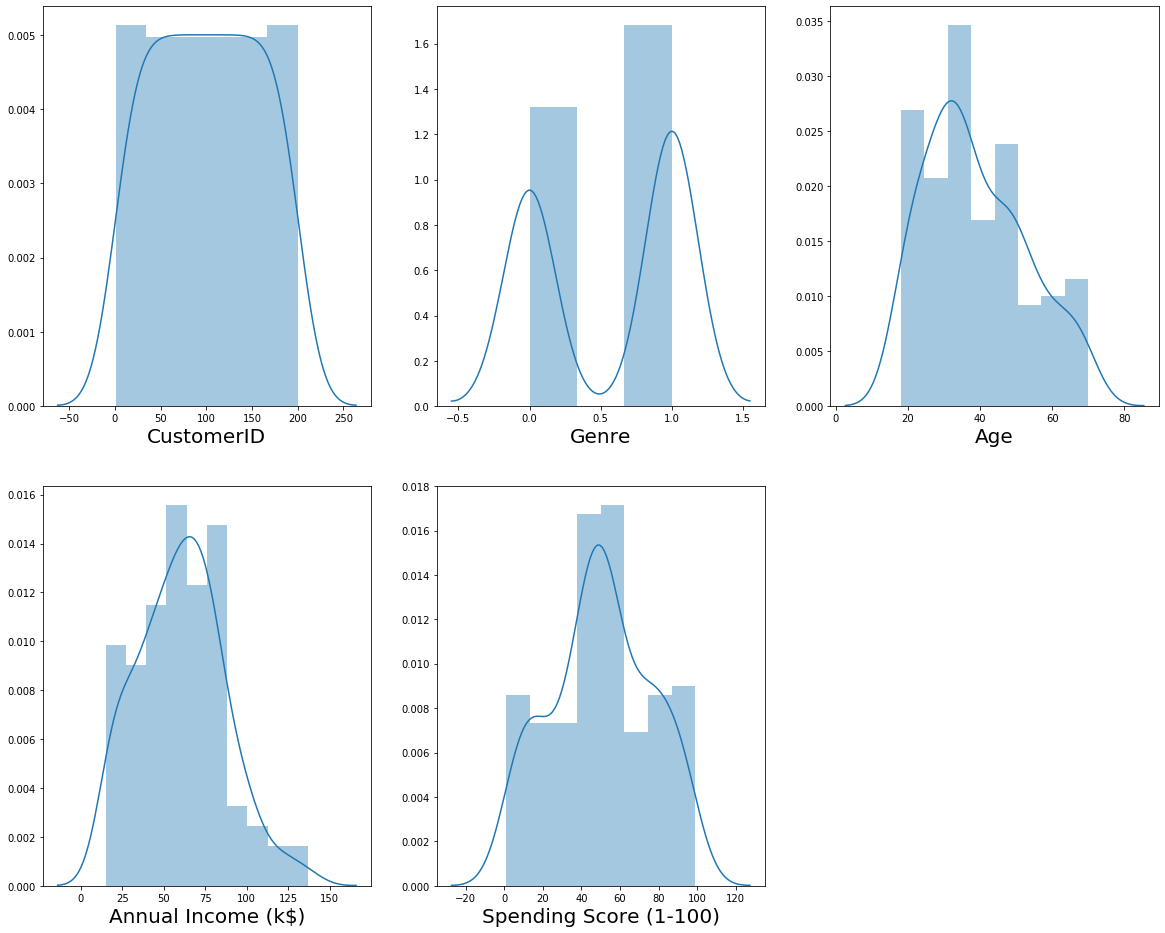

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

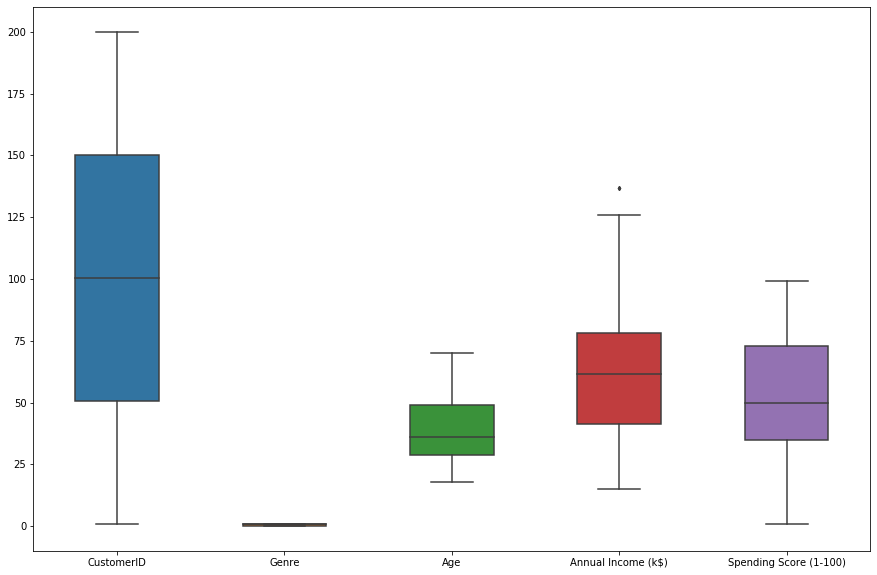

In [7]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [8]:
X = data.iloc[:,2:].values

In [9]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

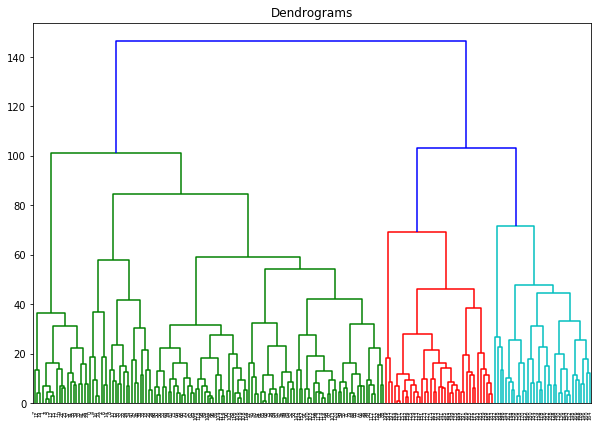

In [20]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='complete'))

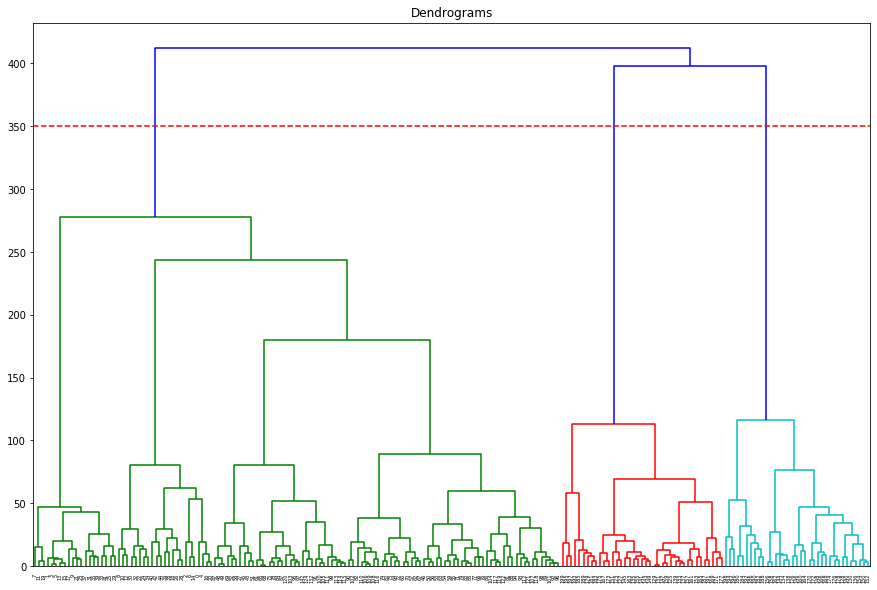

In [46]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=350, color='r', linestyle='--')

In [22]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='complete', distance_threshold=120)
cluster.fit(X)
labels = cluster.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [13]:
len(set(labels))

2

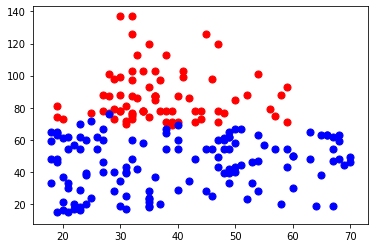

In [23]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
# plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
# plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
# plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

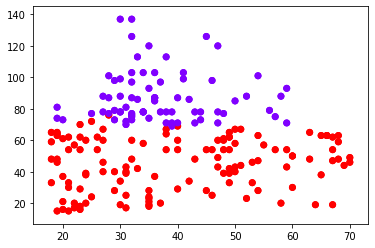

In [24]:
for i in range(len(set(labels))):
    plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [10]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [11]:
def dendrogram(data, method=None):
    plt.figure(figsize=(10, 7))  
    plt.title("Dendrograms")  
    dend = shc.dendrogram(shc.linkage(X, method=method))
    plt.savefig('Dendrogram.png')

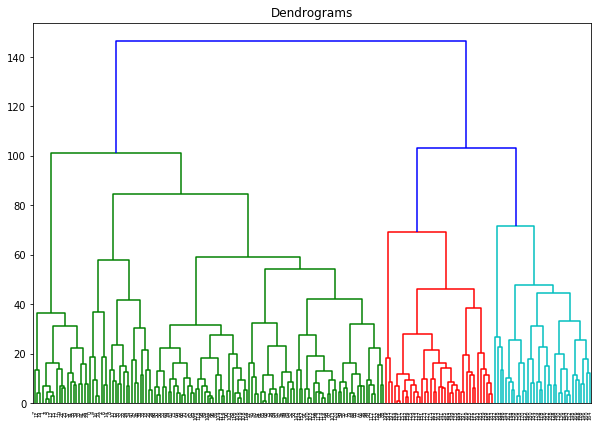

In [12]:
dendrogram(X, 'complete')

In [13]:
import pickle
import os
import shutil

In [14]:
def save_model(model, filename):
    with open(filename+'.sav','wb') as f:
        pickle.dump(model,f)
    return 'success'

In [46]:
def hierarichal(data, linkage=None, threshold=None):
    clusters=[]
    cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage=linkage, distance_threshold=threshold)
    y_cluster = cluster.fit_predict(X)
    save_model(cluster, 'Agglomerative')
    labels = cluster.labels_
    for i in range(len(set(labels))):
        plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
        plt.savefig('Clustered_Data.png')
    return labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

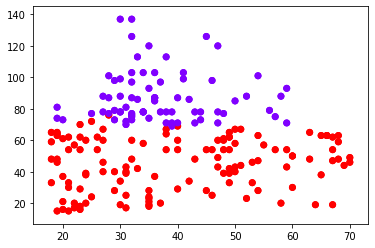

In [47]:
hierarichal(X,'complete',120)

In [48]:
labels

NameError: name 'labels' is not defined

In [22]:
cluster_labels = pd.DataFrame(labels)
cluster_labels

NameError: name 'labels' is not defined

In [35]:
cluster_labels.rename({0:"Clusters"}, axis=1, inplace=True)

In [36]:
cluster_labels

,Clusters
0,1
1,1
2,1
3,1
4,1
...,...
195,0
196,0
197,0
198,0


In [76]:
data_2 = data.copy()

In [47]:
data_1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [50]:
data_1['Clusters'] = cluster_labels

In [53]:
data_1.head(100)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,1
3,4,1,23,16,77,1
4,5,1,31,17,40,1
...,...,...,...,...,...,...
95,96,0,24,60,52,1
96,97,1,47,60,47,1
97,98,1,27,60,50,1
98,99,0,48,61,42,1


In [77]:
data_2['Cluster'] = labels
data_2

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,1
3,4,1,23,16,77,1
4,5,1,31,17,40,1
...,...,...,...,...,...,...
195,196,1,35,120,79,0
196,197,1,45,126,28,0
197,198,0,32,126,74,0
198,199,0,32,137,18,0


In [ ]:
list_of_cluster = 

In [44]:
def dataintocsv(data, clusters):
    data['Clusters'] = clusters
    data.to_csv('Clustered_Data.csv')
    return data

In [45]:
dataintocsv(data, clusters)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,0,19,15,39,None
1,2,0,21,15,81,None
2,3,1,20,16,6,None
3,4,1,23,16,77,None
4,5,1,31,17,40,None
...,...,...,...,...,...,...
195,196,1,35,120,79,None
196,197,1,45,126,28,None
197,198,0,32,126,74,None
198,199,0,32,137,18,None
